In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('daily_ACN.csv')
# df = df['close']
# df

In [3]:
# calculate simple moving average
def sma(data, window):
    if len(data) < window:
            return None
    return sum(data[-window:]) / float(window)


# calculate exponential moving average, with time period 10
def ema_10(data, window = 10):
    if len(data) < 2 * window:
#         raise ValueError("data is too short")
        return 0
    c = 2.0 / (window + 1)
    current_ema = sma(data[-window*2:-window], window)
    for value in data[-window:]:
        current_ema = (c * value) + ((1 - c) * current_ema)
    return current_ema

# calculate exponential moving average, with time period 20
def ema_20(data, window = 20):
    if len(data) < 2 * window:
#         raise ValueError("data is too short")
        return 0
    c = 2.0 / (window + 1)
    current_ema = sma(data[-window*2:-window], window)
    for value in data[-window:]:
        current_ema = (c * value) + ((1 - c) * current_ema)
    return current_ema

today = 99

train_y = df['close'][:today]
valid_y = df['close'][today]

e10 = ema_10(train_y)
e20 = ema_20(train_y)

print('e10_closing: ', e10, '-- e20_closing: ', e20)
print('[actual closing: ', valid_y,"]")

print('e10 error: ', e10-valid_y, '-- e20 error: ', e20-valid_y)

e10_closing:  136.261678156 -- e20_closing:  137.64259017
[actual closing:  136.84 ]
e10 error:  -0.578321843635 -- e20 error:  0.802590169744


In [4]:
if e10 > e20:
    print('Good to Buy')
elif e10 < e20:
    print('Good to Sell')
elif e10 == e20:
    print('Hold it')

Good to Sell


/Users/japjot/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  """
/Users/japjot/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  


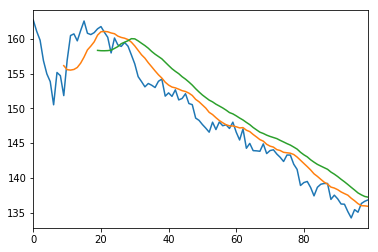

In [5]:
%matplotlib inline

# look at rough data trend (set 10 and 20 to what you set ema windows)
df['close'].plot()
pd.rolling_mean(df['close'], 10).plot()
pd.rolling_mean(df['close'], 20).plot()